# Handling categorical data

In [14]:
import pandas as pd
df = pd.DataFrame({
    "EID":[101, 102, 103, 104],
    "Name": ["Prabin", "Shishir", "Pritam", "Swayam"],
    "Level": ['Junior', 'Senior', 'Junior', 'Mid']
    })

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   EID     4 non-null      int64 
 1   Name    4 non-null      object
 2   Level   4 non-null      object
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes
None


In [16]:
#convert it to category data type
df['Level'] = df['Level'].astype('category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   EID     4 non-null      int64   
 1   Name    4 non-null      object  
 2   Level   4 non-null      category
dtypes: category(1), int64(1), object(1)
memory usage: 328.0+ bytes
None


In [17]:
df['Level'].cat

In [18]:
print(df['Level'].cat.categories)

Index(['Junior', 'Mid', 'Senior'], dtype='object')


In [19]:
df['Level'] = df['Level'].cat.rename_categories({"Junior": "Jr", "Senior": "Sr"})

In [20]:
print(df['Level'].cat.categories)

Index(['Jr', 'Mid', 'Sr'], dtype='object')


In [21]:
df

,EID,Name,Level
0,101,Prabin,Jr
1,102,Shishir,Sr
2,103,Pritam,Jr
3,104,Swayam,Mid


# Label Encoding

In [22]:
df['Level_Code'] = df['Level'].cat.codes
df.head()

,EID,Name,Level,Level_Code
0,101,Prabin,Jr,0
1,102,Shishir,Sr,2
2,103,Pritam,Jr,0
3,104,Swayam,Mid,1


# One hot encoding

In [23]:
encoded = pd.get_dummies(df['Level'], prefix='Lev', dtype=int)
print(encoded)

   Lev_Jr  Lev_Mid  Lev_Sr
0       1        0       0
1       0        0       1
2       1        0       0
3       0        1       0


In [24]:
df_final = pd.concat([df, encoded], axis=1)
df_final

,EID,Name,Level,Level_Code,Lev_Jr,Lev_Mid,Lev_Sr
0,101,Prabin,Jr,0,1,0,0
1,102,Shishir,Sr,2,0,0,1
2,103,Pritam,Jr,0,1,0,0
3,104,Swayam,Mid,1,0,1,0


# Handling time series data

In [38]:
df_2 = pd.DataFrame({
    'Date': ['2026-01-20', '2026-01-21', '2026-02-22', '2026-01-23'],
    'Sales': [120, 135, 128, 140]
})
df_2

,Date,Sales
0,2026-01-20,120
1,2026-01-21,135
2,2026-02-22,128
3,2026-01-23,140


In [39]:
print(df_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    4 non-null      object
 1   Sales   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes
None


In [40]:
df_2['Date'] = pd.to_datetime(df_2['Date'])
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4 non-null      datetime64[ns]
 1   Sales   4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 192.0 bytes


In [41]:
df_2 = df_2.set_index('Date')
df_2

,Sales
Date,
2026-01-20,120
2026-01-21,135
2026-02-22,128
2026-01-23,140


In [45]:
df_2['Year'] = df_2.index.year
df_2['Month'] = df_2.index.month
df_2['Day_name'] = df_2.index.day_name()
df_2

,Sales,Year,Month,Day_name
Date,,,,
2026-01-20,120,2026,1,Tuesday
2026-01-21,135,2026,1,Wednesday
2026-02-22,128,2026,2,Sunday
2026-01-23,140,2026,1,Friday


In [ ]:
df_2.loc["2026-01-20":"2026-01-22"]

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [55]:
df_2.to_csv("dates.csv")

<Axes: xlabel='Day_name'>

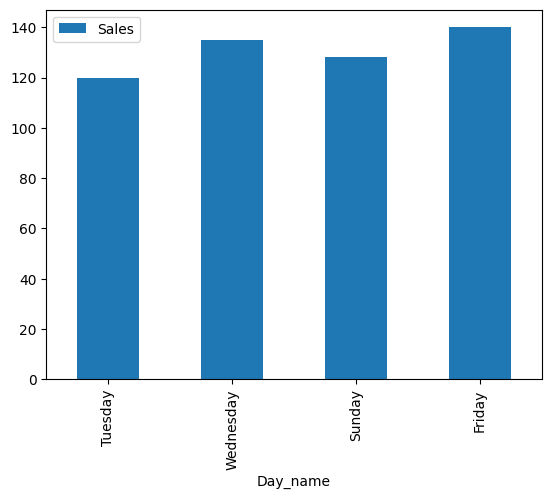

In [57]:
df_2.plot.bar(x='Day_name', y='Sales')

In [59]:
new_df = pd.read_csv(
    "dates.csv",
    parse_dates=['Date'],
    index_col='Date'
    )
new_df

,Sales,Year,Month,Day_name
Date,,,,
2026-01-20,120,2026,1,Tuesday
2026-01-21,135,2026,1,Wednesday
2026-02-22,128,2026,2,Sunday
2026-01-23,140,2026,1,Friday


# Feature Scaling

0    0.000000
1    0.693147
2    2.397895
3    4.615121
4    6.908755
dtype: float64


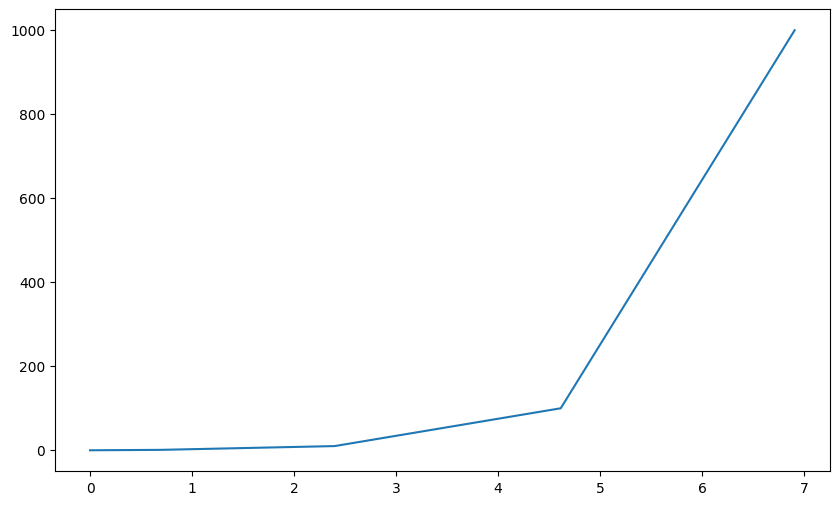

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x = pd.Series([0, 1, 10, 100, 1000])
x_log = np.log1p(x)

plt.figure(figsize=(10, 6))
plt.plot(x_log, x)
print(x_log)

### sqrt transformation

### power transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')

### Normalization

In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = [10, 200, 800, 900, 1000]
normalized = []

for data in X:
    x_std = (data - min(X))/(max(X) - min(X))
    normalized.append(x_std)

normalized

[0.0, 0.1919191919191919, 0.797979797979798, 0.898989898989899, 1.0]

### z score normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
X = np.array([[10], [100], [500], [900], [1000]])
